该项目基于sklearn库中的威斯康辛州乳腺癌数据集，使用随机森林进行训练。

## 1. 数据集分析

In [6]:
#导入所需库
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import matplotlib
#从sklearn中加载数据集
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()  # 加载乳腺癌数据集

#可视化和模型评估相关的导入
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [7]:
#导入cancer数据集
cancer = load_breast_cancer() 

#使用pd对特征进行观察
feature = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

#显示数据集的特征
print("数据集中特征的参数：{}".format(feature.shape))
feature

数据集中特征的参数：(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**该数据集中存在569组数据，数据分为30个特征。**

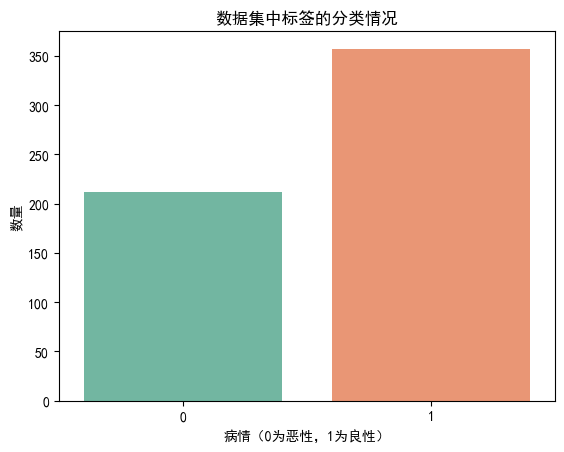

In [8]:
#观察数据集中的标签分类和数量。

#指明字体参数，实现中文标签
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体

sns.countplot(x = cancer['target'], palette="Set2")#0 恶性 1 良性
plt.ylabel("数量")
plt.xlabel("病情（0为恶性，1为良性）")
plt.title("数据集中标签的分类情况")

plt.show()

**用直方图观察数据集中每个特征的分布情况。**

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


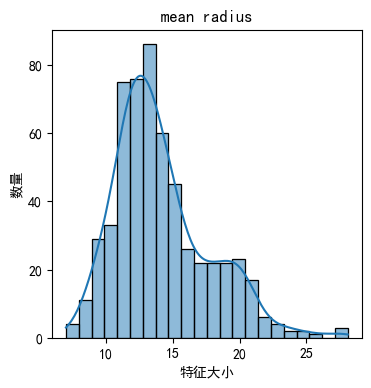

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


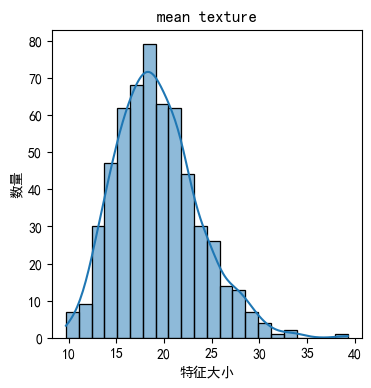

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


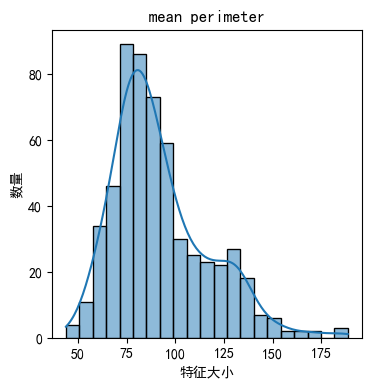

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


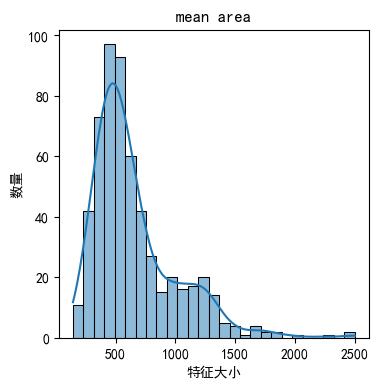

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


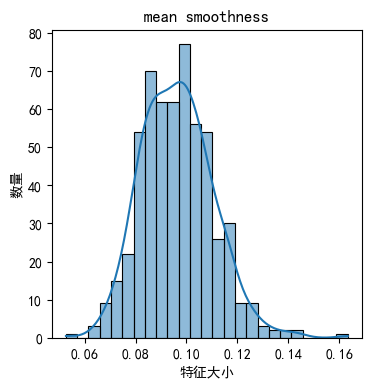

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


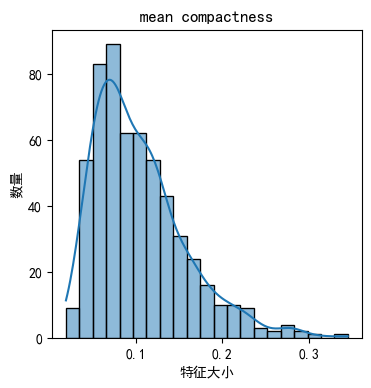

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


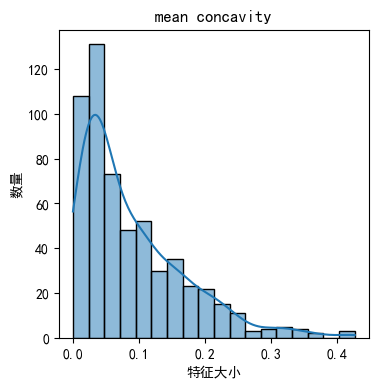

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


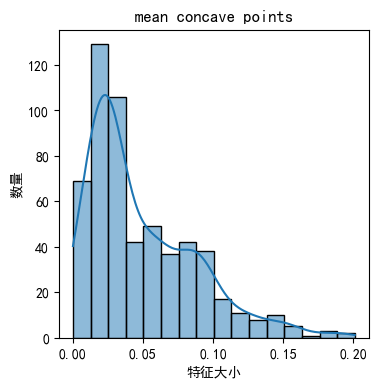

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


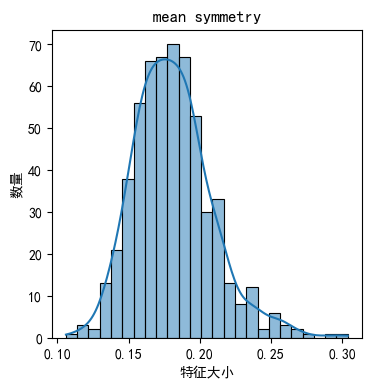

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


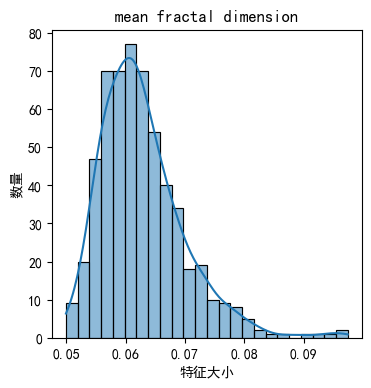

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


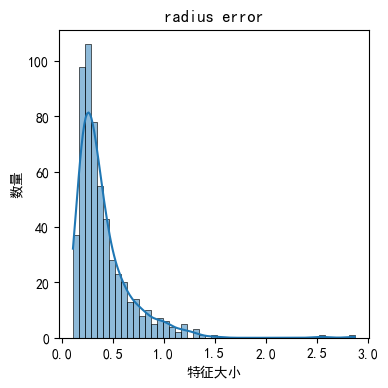

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


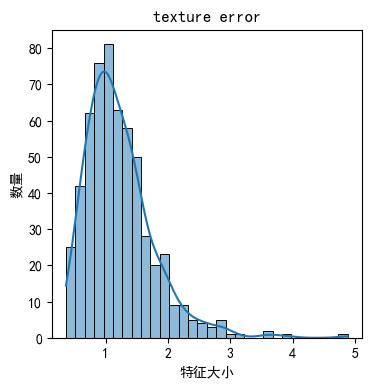

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


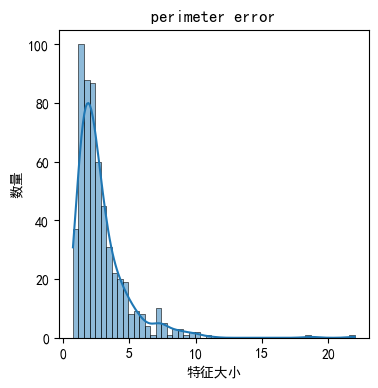

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


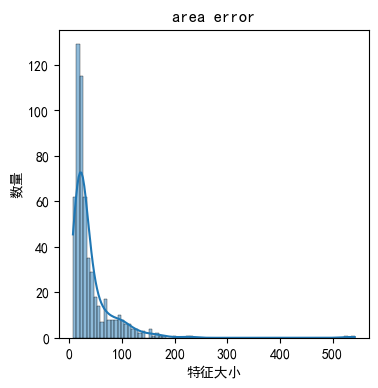

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


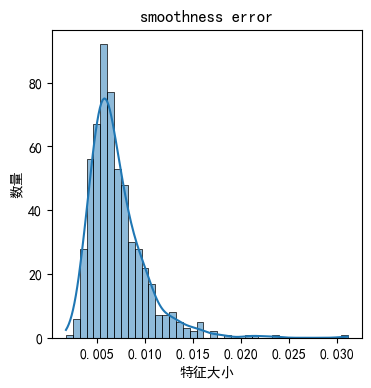

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


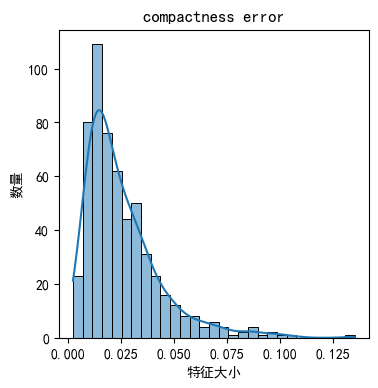

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


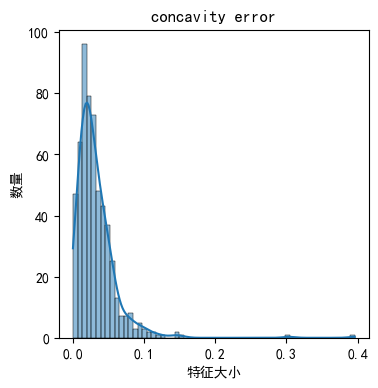

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


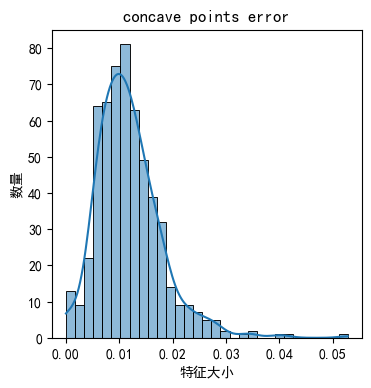

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


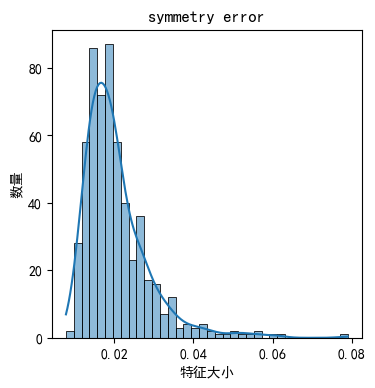

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


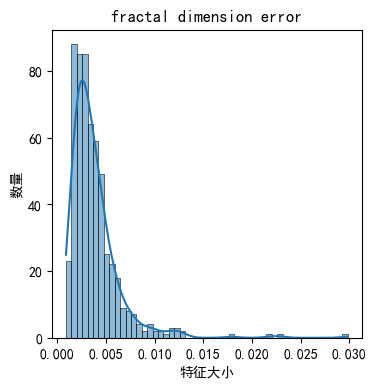

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


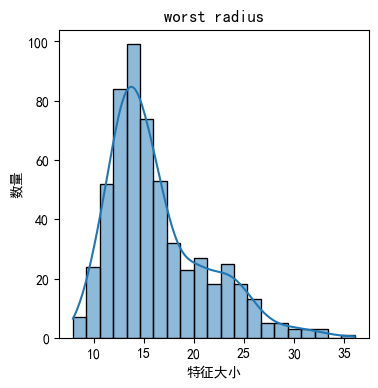

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


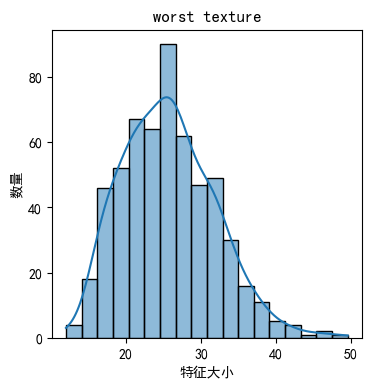

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


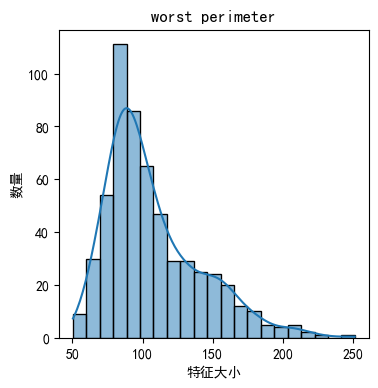

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


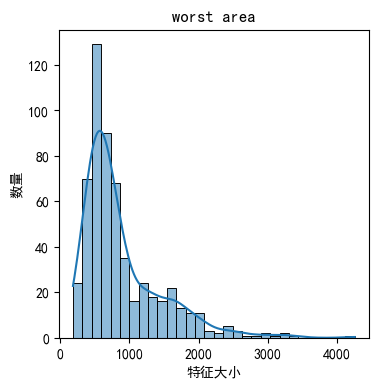

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


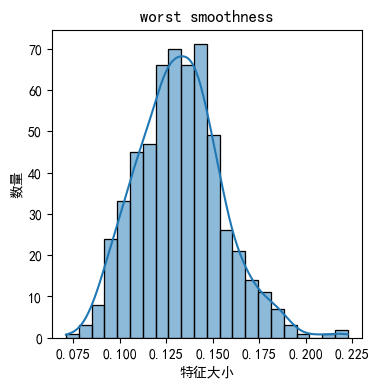

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


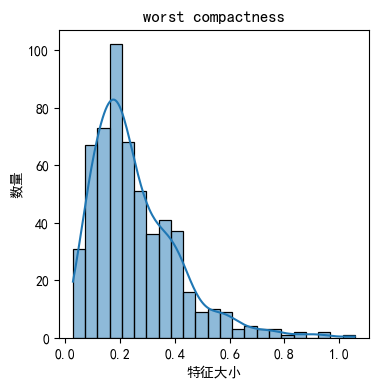

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


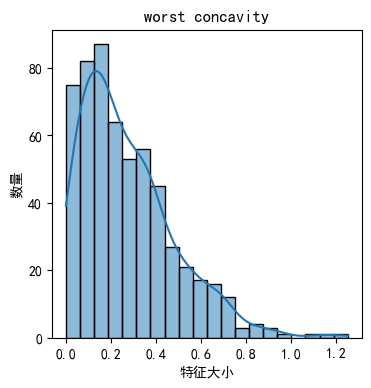

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


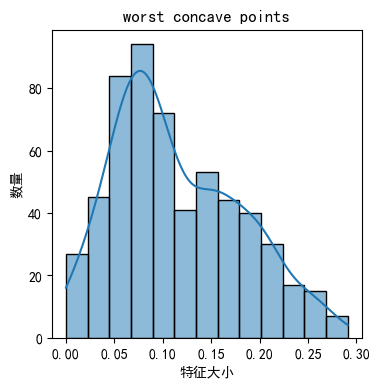

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


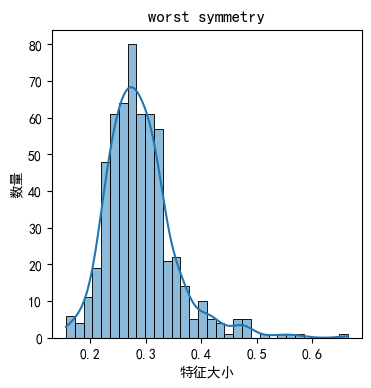

D:\APP\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


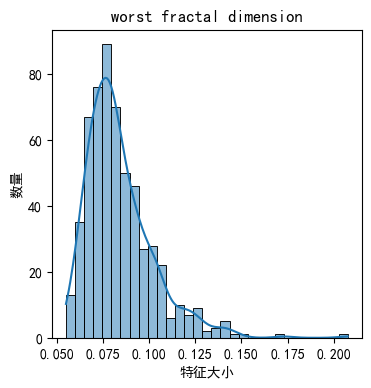

In [9]:
#绘制每个数值属性的直方图
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体

for i, feature_name in enumerate(feature.columns.values):
    
    plt.figure(figsize=(4, 4))
    sns.histplot(feature.iloc[:, i], kde=True)

    plt.xlabel("特征大小")
    plt.ylabel("数量")
    plt.title(feature_name)
    plt.show()


D:\APP\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
D:\APP\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


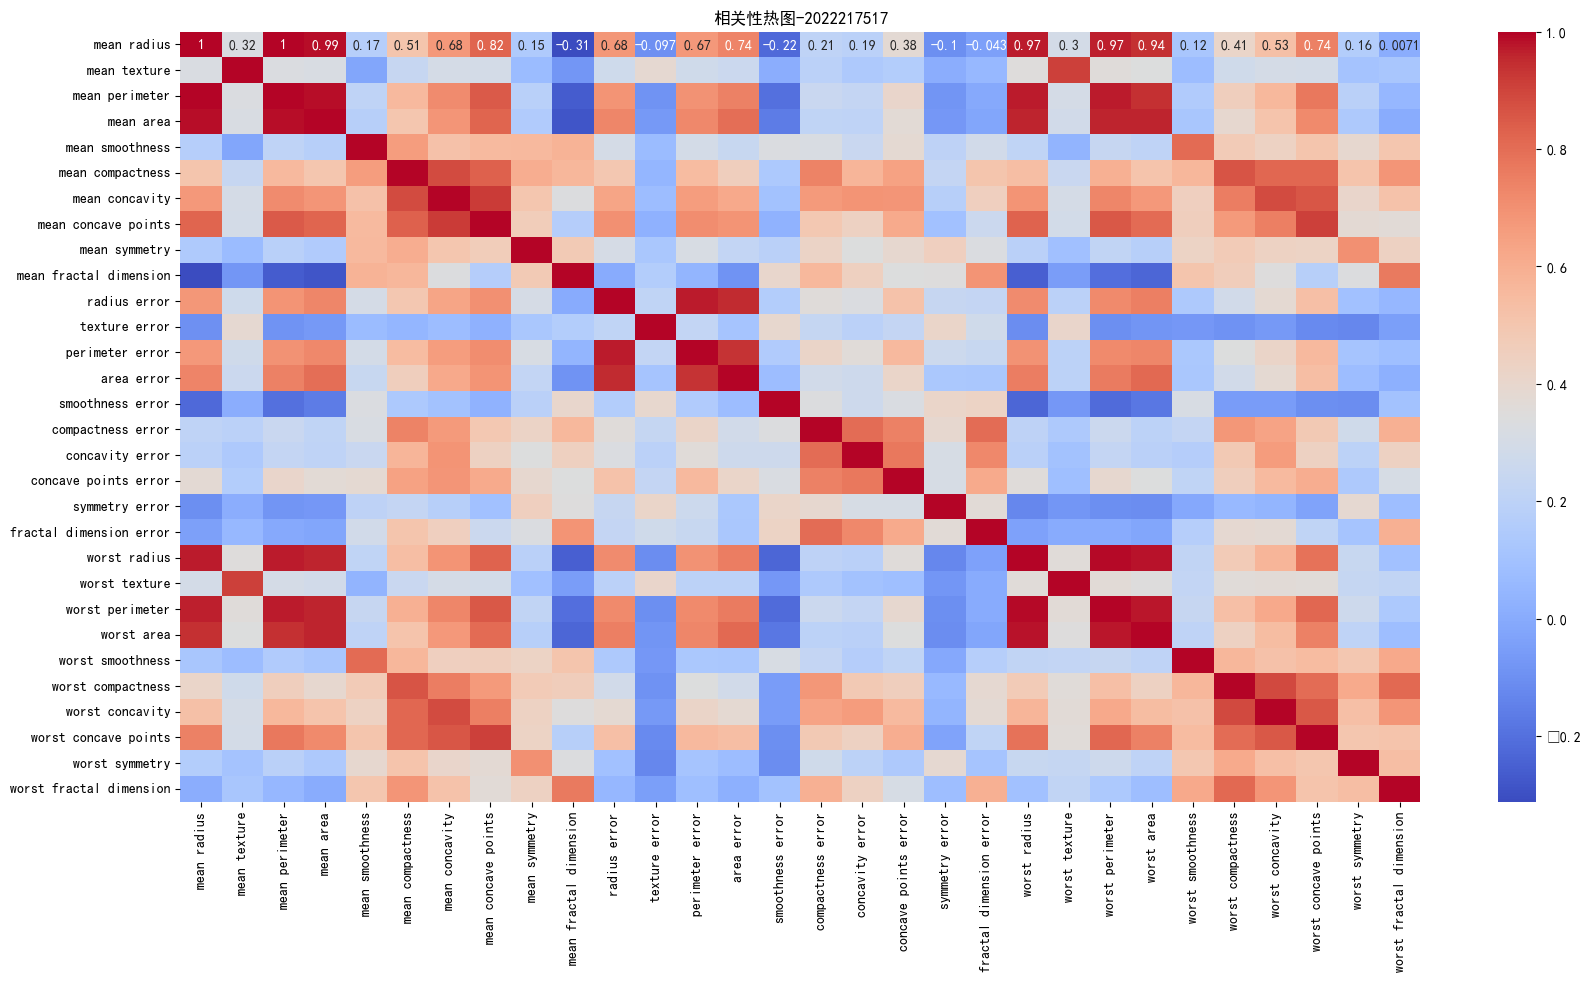

In [10]:
# 可视化相关系数热力图
plt.figure(figsize=(20, 10))
sns.heatmap(feature.corr(), annot=True, cmap="coolwarm")
plt.title("相关性热图-2022217517")
plt.show()

**热力图中的颜色表示相关性的强度。颜色深，说明两者相关性强，可以剔除两者中的一个变量，从而避免过拟合**

# 2.随机森林算法实现

## 对数据集机型划分

模型准确率: 0.9649122807017544


## 实现创建、训练模型等功能

In [14]:
X, y = cancer.data, cancer.target
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测测试集
y_pred = rf_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率:", accuracy)

模型准确率: 0.9649122807017544


In [ ]:
0.96491说明了模型几乎完美地学会了训练数据中的模式。

## 实现各个特征对于模型预测的重要性排序的功能

In [16]:
# 获取特征重要性
feature_importance = rf_model.feature_importances_

# 特征重要性排序
indices = np.argsort(feature_importance)[::-1]

# 打印特征重要性排序结果
print("特征重要性排序:")
for i, feature_index in enumerate(indices):
    print(f"{i + 1}. {cancer.feature_names[feature_index]}: {feature_importance[feature_index]}")

特征重要性排序:
1. worst area: 0.15389236463205394
2. worst concave points: 0.14466326620735528
3. mean concave points: 0.10620998844591638
4. worst radius: 0.07798687515738047
5. mean concavity: 0.06800084191430111
6. worst perimeter: 0.06711483267839194
7. mean perimeter: 0.053269746128179675
8. mean radius: 0.048703371737755234
9. mean area: 0.04755500886018552
10. worst concavity: 0.031801595740040434
11. area error: 0.022406960160458473
12. worst texture: 0.021749011006763207
13. worst compactness: 0.020266035899623565
14. radius error: 0.02013891719419153
15. mean compactness: 0.013944325074050485
16. mean texture: 0.013590877656998469
17. perimeter error: 0.01130301388178435
18. worst smoothness: 0.010644205147280952
19. worst symmetry: 0.010120176131974357
20. concavity error: 0.009385832251596627
21. mean smoothness: 0.007285327830663239
22. fractal dimension error: 0.00532145634222884
23. compactness error: 0.005253215538990106
24. worst fractal dimension: 0.005210118545497296
25. t

===========


## 模型的学习曲线

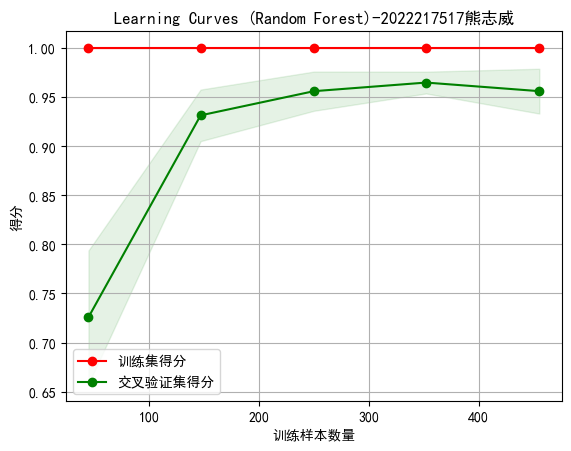

In [25]:
# 定义绘制学习曲线函数
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("训练样本数量")
    plt.ylabel("得分")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="训练集得分")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="交叉验证集得分")

    plt.legend(loc="best")
    return plt

# 绘制学习曲线
title = "Learning Curves (Random Forest)-2022217517熊志威"
plot_learning_curve(rf_model, title, X, y, cv=5)
plt.show()

====================

## 模型的混淆矩阵

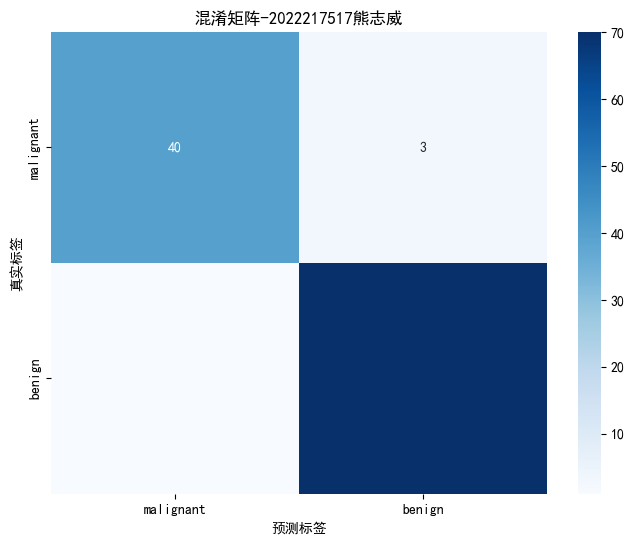

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix



# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵-2022217517熊志威')
plt.show()

## 模型的ROC曲线

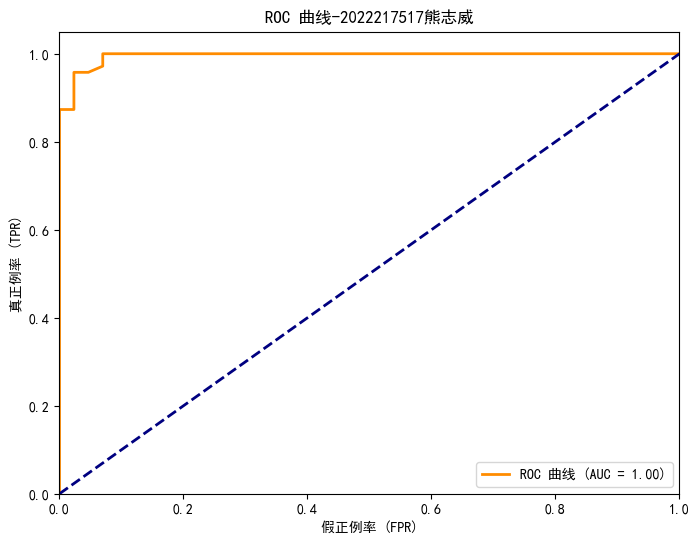

In [23]:
from sklearn.metrics import roc_curve, auc

# 计算模型的预测概率
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 计算 ROC 曲线上的点
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 计算 AUC（曲线下的面积）
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正例率 (FPR)')
plt.ylabel('真正例率 (TPR)')
plt.title('ROC 曲线-2022217517熊志威')
plt.legend(loc='lower right')
plt.show()